In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

#使用中文字体
mpl.rcParams['font.family']=['Microsoft Yahei','sans-serif']
mpl.rcParams['axes.unicode_minus']=False

#使用svg格式，避免图形模糊
%matplotlib inline
%config InlineBackend.figure_format="svg"

In [2]:
import pandas as pd
df = pd.read_csv("bank.csv")
df.head()

,age,default,balance,housing,loan,day,month,campaign,pdays,previous,...,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,27,False,35,False,False,4,7,1,-1,0,...,True,False,True,False,True,False,False,False,False,True
1,54,False,466,False,False,4,7,1,-1,0,...,False,True,False,False,True,False,False,False,False,True
2,43,False,105,False,False,4,7,2,-1,0,...,False,False,True,False,True,False,False,False,False,True
3,31,False,19,False,False,4,7,2,-1,0,...,True,False,True,False,False,True,False,False,False,True
4,27,False,126,False,False,4,7,4,-1,0,...,True,False,True,False,True,False,False,False,False,True


In [42]:
x = df.drop(columns=["y"])
y = df["y"]

In [43]:
#将数据分为训练集和验证集
from sklearn.model_selection import train_test_split

train_x,val_x,train_y,val_y=train_test_split(
    x,y,train_size=0.7,random_state=0)

In [44]:
#Logistic回归
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr_model = LogisticRegression(max_iter=10000).fit(train_x,train_y)
classification_report(val_y,lr_model.predict(val_x), output_dict=True)

{'False': {'precision': 0.8748872858431019,
  'recall': 0.9816618186417099,
  'f1-score': 0.9252041242028727,
  'support': 7907.0},
 'True': {'precision': 0.6384039900249376,
  'recall': 0.18740849194729137,
  'f1-score': 0.289756649688738,
  'support': 1366.0},
 'accuracy': 0.8646608433085301,
 'macro avg': {'precision': 0.7566456379340198,
  'recall': 0.5845351552945006,
  'f1-score': 0.6074803869458053,
  'support': 9273.0},
 'weighted avg': {'precision': 0.8400510751143612,
  'recall': 0.8646608433085301,
  'f1-score': 0.8315967425371433,
  'support': 9273.0}}

In [46]:
#支持向量机
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

lsvc_model = LinearSVC(max_iter=10000).fit(train_x,train_y)
classification_report(val_y,lsvc_model.predict(val_x), output_dict=True)

{'False': {'precision': 0.8755083596927248,
  'recall': 0.980144176046541,
  'f1-score': 0.9248761859299481,
  'support': 7907.0},
 'True': {'precision': 0.6270783847980997,
  'recall': 0.19326500732064422,
  'f1-score': 0.29546726357022945,
  'support': 1366.0},
 'accuracy': 0.8642294834465652,
 'macro avg': {'precision': 0.7512933722454123,
  'recall': 0.5867045916835927,
  'f1-score': 0.6101717247500889,
  'support': 9273.0},
 'weighted avg': {'precision': 0.8389122909225256,
  'recall': 0.8642294834465652,
  'f1-score': 0.8321583397158454,
  'support': 9273.0}}

In [47]:
#贝叶斯分类
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
by_model = GaussianNB().fit(train_x,train_y)
classification_report(val_y,by_model.predict(val_x), output_dict=True)

{'False': {'precision': 0.8886921325575512,
  'recall': 0.8885797394713545,
  'f1-score': 0.8886359324606337,
  'support': 7907.0},
 'True': {'precision': 0.35552304316020483,
  'recall': 0.3557833089311859,
  'f1-score': 0.3556531284302964,
  'support': 1366.0},
 'accuracy': 0.8100938207699774,
 'macro avg': {'precision': 0.622107587858878,
  'recall': 0.6221815242012703,
  'f1-score': 0.622144530445465,
  'support': 9273.0},
 'weighted avg': {'precision': 0.810151317706179,
  'recall': 0.8100938207699774,
  'f1-score': 0.8101225591935743,
  'support': 9273.0}}

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
dt_model = DecisionTreeClassifier().fit(train_x,train_y)
classification_report(val_y,dt_model.predict(val_x), output_dict=True)

{'False': {'precision': 0.8824208231824593,
  'recall': 0.8703680283293285,
  'f1-score': 0.8763529861199542,
  'support': 7907.0},
 'True': {'precision': 0.3046132971506106,
  'recall': 0.328696925329429,
  'f1-score': 0.31619718309859157,
  'support': 1366.0},
 'accuracy': 0.7905747870160682,
 'macro avg': {'precision': 0.5935170601665349,
  'recall': 0.5995324768293787,
  'f1-score': 0.5962750846092728,
  'support': 9273.0},
 'weighted avg': {'precision': 0.7973043473321945,
  'recall': 0.7905747870160682,
  'f1-score': 0.7938367748693145,
  'support': 9273.0}}

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf_model = RandomForestClassifier().fit(train_x,train_y)
classification_report(val_y,rf_model.predict(val_x), output_dict=True)

{'False': {'precision': 0.8781934306569343,
  'recall': 0.9738206652333375,
  'f1-score': 0.9235382308845578,
  'support': 7907.0},
 'True': {'precision': 0.5900990099009901,
  'recall': 0.21815519765739386,
  'f1-score': 0.3185462319615179,
  'support': 1366.0},
 'accuracy': 0.862504043998706,
 'macro avg': {'precision': 0.7341462202789621,
  'recall': 0.5959879314453657,
  'f1-score': 0.6210422314230378,
  'support': 9273.0},
 'weighted avg': {'precision': 0.8357544164487364,
  'recall': 0.862504043998706,
  'f1-score': 0.8344172268374453,
  'support': 9273.0}}

In [74]:
models = {
    "Logistic回归": lr_model,
    "支持向量机": lsvc_model,
    "朴素贝叶斯": by_model,
    "决策树": dt_model,
    "随机森林": rf_model,
}


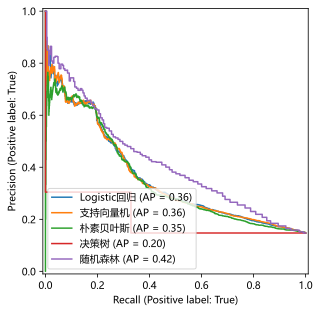

In [75]:
from sklearn.metrics import PrecisionRecallDisplay
fig, ax = plt.subplots()
for key in models:
    model = models[key]
    PrecisionRecallDisplay.from_estimator(
        model,val_x,val_y,name=key,ax = ax
    )
plt.show()

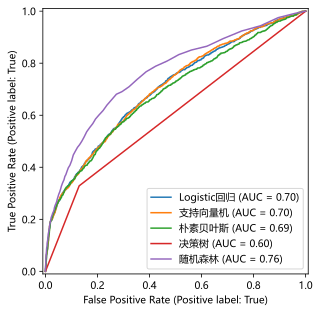

In [76]:
from sklearn.metrics import RocCurveDisplay
fig, ax = plt.subplots()

for key in models:
    i+=1
    model = models[key]
    RocCurveDisplay.from_estimator(
        model,val_x,val_y,name=key,ax = ax
    )
plt.show()